In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import anndata
import scipy.stats

import re
import os
import tarfile
import scanpy as sc
import seaborn as sns
import umap
import sklearn.cluster
import h5py

C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\umap\distances.py:1086: NumbaDeprecatio

In [3]:
from matplotlib.colors import LinearSegmentedColormap
values = [0,1]
colors = [(227, 227, 227), (255, 42, 18)]
norm = plt.Normalize(min(values), max(values))
my_cmap = LinearSegmentedColormap.from_list(
    '', [(norm(value), tuple(np.array(color) / 255)) for value, color in zip(values, colors)])
my_cmap.set_bad(color='#E3E3E3')

In [4]:
adata = sc.read_h5ad('F:/Transwell/healthy adult data/GSE185224_clustered_annotated_adata_k10_lr0.92_v1.6.h5ad')

### Calculate commonly expressed genes

In [15]:
adata[adata.obs['organ'].isin(['SI']),:].obs['lineage'].cat.categories

C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Index(['SI_ISC', 'SI_TA', 'SI_TA2', 'SI_earlyAE', 'SI_intermAE', 'SI_matureAE',
       'SI_AE2', 'SI_paneth', 'SI_tuft', 'SI_secretory_prog', 'SI_goblet',
       'SI_EEC', 'SI_FAE', 'SI_BEST4'],
      dtype='object')

In [25]:
our_names =  ['SI_ISC', 'SI_TA','SI_earlyAE', 'SI_matureAE','SI_secretory_prog', 'SI_goblet',
       'SI_EEC']
SI_common_genes=dict()
for i in our_names:
    adata_temp = adata[adata.obs['lineage'] == i, :]
    sc.pp.filter_genes(adata_temp, min_cells = np.ceil(adata_temp.shape[0]*0.3))
    SI_common_genes[i] = adata_temp.var_names
SI_common_genes = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in SI_common_genes.items() ]))
SI_common_genes.to_csv('SI_common_genes.csv')

C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\16220\anacond

In [26]:
our_names =  ['C_ISC', 'C_TA', 'C_earlyACC', 'C_lateACC',
       'C_secretory_prog', 'C_goblet', 'C_EEC',]
C_common_genes=dict()
for i in our_names:
    adata_temp = adata[adata.obs['lineage'] == i, :]
    sc.pp.filter_genes(adata_temp, min_cells = np.ceil(adata_temp.shape[0]*0.3))
    C_common_genes[i] = adata_temp.var_names
C_common_genes = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in C_common_genes.items() ]))
C_common_genes.to_csv('C_common_genes.csv')

C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\16220\anacond

In [21]:
TW_common_genes = pd.read_csv('TW_common_genes.csv',index_col = 0)

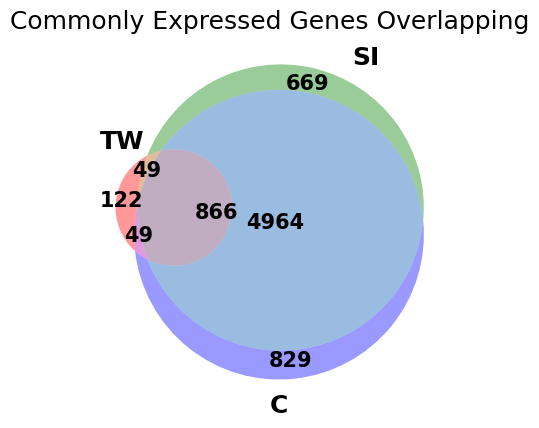

In [31]:
from matplotlib_venn import venn3
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
names = ['ISCLC', 'TALC', 'early ECLC', 'ECLC',
       'SECPLC', 'GCLC', 'EECLC']
for i in range(0,TW_common_genes.shape[1]):
    plt.close()
    set1 = set(TW_common_genes.iloc[:,i])
    set2 = set(SI_common_genes.iloc[:,i])
    set3 = set(C_common_genes.iloc[:,i])
    venn3([set1, set2, set3], ('TW', 'SI', 'C'))
    plt.title("Commonly Expressed Genes Overlapping".format(i))
    plt.savefig(names[i]+'commonly_expressed_venn.png', dpi=300, bbox_inches='tight')

### Plot TW markers with our cells

In [4]:
TW_DE = pd.read_csv('general_celltype_DE.csv',index_col = 0)

In [11]:
import pickle
with open('F:/Transwell/TW_id_group.pkl', 'rb') as file:
    # Load the data from the file
    loaded_variable = pickle.load(file)

In [46]:
from scipy.cluster.hierarchy import linkage, leaves_list
import matplotlib
matplotlib.rc_file_defaults()
plt.close()
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
names = ['ISC','TA','Goblet','EEC']
#define the important gene that audience might interested
imp_genes = dict()
imp_genes['ISC'] = ['LGR5', 'ASCL2','SMOC2','MSI1','OLFM4']
imp_genes['TA'] = ['TOP2A','DNMT1','BLM','FEN1','PCNA','UHRF1','MCM10','BRCA1','TYMS','RAD51AP1','CHEK1','WDHD1','CDT1','HELLS','RFC3','RMI2','RFC4','XRCC2','FANCA','CDC6','POLE2','CDK1','MCM3','TIMELESS','MCM4','MCM5','DNA2','MCM6','MCM2']
imp_genes['Sec. Progenitor'] = ['HES6','SOX4','HOPX','ATOH1','MEX3A']
imp_genes['Goblet'] = ['MUC2','MUC5AC','FCGBP','SOX4','SPDEF', 'FCGBP','TFF3']
imp_genes['EEC'] = ['CHGA','CHGGB','INSM1','PAX4','PAX6']


plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 11, 'font.weight': 'heavy','axes.linewidth':2})
our_names =  ['ISC','TA','goblet','EEC']
TW_names = ['Intestinal Stem like (ISCLC)',
             'Transit Amplifying like (TALC)',
             'Goblet like (GCLC)',
             'Enteroendocrine like (EECLC)']
adata_df = pd.DataFrame(adata.layers['raw_normalized'].A)
adata_df.index = adata.obs_names
adata_df.columns = adata.var_names
adata_df['type'] = adata.obs['type']
adata_df['lineage'] = adata.obs['lineage']

color = np.array(adata_df['lineage'].values.ravel())
for j in range(0, len(color)):
    id = np.where(adata.obs['lineage'].cat.categories == color[j])[0][0]
    color[j]=adata.uns['lineage_colors'][id]
adata_df['color'] = color

TW_gene_reordered = dict()

def cluster_cols(data):
    Z = linkage(data.T, method='average')  # Note the transpose (.T) to cluster columns
    order = leaves_list(Z)
    return data.iloc[:, order]

In [47]:
for i in range(0, len(TW_names)):
    # Create the combined list
    TW_DE_list = TW_DE[TW_names[i]].dropna()
    adata_df[TW_DE_list[~TW_DE_list.isin(adata_df.columns)].tolist()] = np.zeros([adata_df.shape[0], len(TW_DE_list[~TW_DE_list.isin(adata_df.columns)].tolist())])

    # Slice data for clustering
    adata_slice = adata_df.loc[adata_df['type'] == our_names[i], :]
    adata_slice = adata_slice.sort_values(by='lineage')
    
    col_colors = adata_slice['color'].tolist()
    
    adata_slice = adata_slice[TW_DE_list]

    adata_slice_clustered = cluster_cols(adata_slice)
    
    ribo_gene_mask = [gene.startswith('RPL') or gene.startswith('RPS') for gene in adata_slice_clustered.columns]
    adata_slice_clustered = adata_slice_clustered.loc[:,np.array(ribo_gene_mask)==False]
    
    TW_gene_reordered[names[i]] = adata_slice_clustered.columns
    print(adata_slice_clustered.columns)
    # Plot the clustered heatmap
    clustergrid = sns.clustermap(adata_slice_clustered.T, figsize=(5, len(TW_DE_list)/5), linewidths=0,
                                 colors_ratio=(0.05, 0.05), yticklabels=True, xticklabels=False, cmap=my_cmap, 
                                 col_colors=col_colors,
                                 col_cluster=False, row_cluster=False, standard_scale=0,
                                 cbar_kws={'label': '', 'location': "left"})

    # Adjustments for the plot
    for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
    clustergrid.ax_cbar.set_position([0, 0.2, 0.03, 0.3])

    axs = clustergrid.fig.get_axes()
    for ax in axs:
        ax.set_xlabel('')
    for lab in axs[3].get_yticklabels():
        text = lab.get_text()
        if text in imp_genes[names[i]]:
            lab.set_weight('bold')
            lab.set_color('red')

    # Save the plot
    #plt.show()
    plt.savefig('F:/Transwell/'+our_names[i] + '_TW_signature_in_human.png', dpi=300, bbox_inches='tight')
    

Index(['SPINK1', 'TFF3', 'SMOC2', 'PLA2G2A', 'SI', 'SORBS2', 'PROX1', 'ADH6',
       'DLL1', 'SERPINF1', 'OLFML3', 'IGDCC3', 'NR2F1', 'FGG', 'TNFRSF19'],
      dtype='object')
Index(['PCNA', 'PCLAF', 'TYMS', 'CCND2', 'UBE2C', 'CDCA7', 'HELLS', 'DHFR',
       'CDK1', 'NUSAP1',
       ...
       'BCAT1', 'SOX2', 'ORM2', 'ANKRD1', 'LINC02413', 'COTL1', 'CENPW',
       'HMGB2', 'CENPF', 'TOP2A'],
      dtype='object', length=157)
Index(['TFF3', 'FCGBP', 'MUC2', 'TMSB4X', 'NEAT1', 'WFDC2', 'LINC00261',
       'GMDS', 'SELENOM', 'HES6',
       ...
       'NPDC1', 'GSN', 'BCAS1', 'XBP1', 'SMIM22', 'CDC42EP5', 'SH3BGRL3',
       'SLC12A2', 'LGALS4', 'S100A6'],
      dtype='object', length=107)
Index(['PCSK1N', 'MDK', 'SOX4', 'KCTD12', 'CDKN1C', 'RGS2', 'HEPACAM2',
       'INSM1', 'EID1', 'RASD1', 'HES6', 'BTG2', 'RAB3B', 'RBP1', 'SSTR2',
       'TP53I3', 'RAMP1', 'DEPP1', 'DPEP1', 'DNAJC12', 'ANXA13', 'BAZ2B',
       'CXXC4', 'GADD45G', 'PAX4', 'IL13RA1', 'PROX1', 'TP53INP1', 'TPCN1',
       '

In [7]:
adata.obs['lineage'].cat.categories

Index(['SI_ISC', 'C_ISC', 'SI_TA', 'SI_TA2', 'C_TA', 'SI_earlyAE',
       'C_earlyACC', 'SI_intermAE', 'SI_matureAE', 'SI_AE2', 'C_lateACC',
       'SI_paneth', 'SI_tuft', 'C_tuft', 'SI_secretory_prog',
       'C_secretory_prog', 'SI_goblet', 'C_goblet', 'SI_EEC', 'C_EEC',
       'SI_FAE', 'SI_BEST4', 'C_BEST4'],
      dtype='object')

In [9]:
absb = dict()
absb['Fatty Acid']=['SLC27A4', 'CD36', 'FABP1', 'FABP2', 'FABP6', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'PCK1', 'PCK2', 'PDK4', 'MTTP', 'DGAT1', 'ASCL5']
absb['Glucose']=['SLC5A1', 'SLC2A2','SLC2A3', 'SLC2A5', 'SLC2A9', 'SLC2A10', 'SLC5A1', 'SLC5A9'] # SLC5A4
absb['Cholestrol']=['ABCG8', 'NPC1L1', 'SCARB1']
absb['Enzyme']=['MGAM', 'SI', 'LCT', 'ANPEP', 'ENPEP', 'DPP4', 'ALPI','CA1','CA2']
absb['Amino Acid']=['SLC15A1', 'SLC6A19', 'SLC6A20', 'PATL1', 'SLC25A15', 'SLC7A8', 'SLC3A1', 'SLC3A2', 'SLC6A6', 'SLC7A7', 'SLC1A5', 'SLC38A1']
absb['Cation']=['SLC22A1', 'SLC22A2', 'SLC22A3', 'SLC22A4', 'SLC22A5', 'SLCO2B1']
absb['Ion']=['SLC25A3', 'SLC26A2','SLC26A3', 'SLC4A7']
absb['Bile'] = ['SLC10A1','SLC10A2','SLCO1A2']
absb['Vitamin']=['RBP2', 'RBP4', 'TCN2', 'CYP4F2', 'CD320']
absb['Water']=['AQP1', 'AQP3', 'AQP7', 'AQP8', 'AQP10', 'AQP11']
absb['Proliferative'] = ['MKI67','TOP2A']

In [14]:
import anndata
sig_list = []
for k,v in absb.items():
    sig_list+=v

missing_genes = pd.Series(sig_list)[pd.Series(sig_list).isin(adata.var_names)==False]
new_variables_data = np.zeros((adata.n_obs, len(missing_genes)))
adata_forvis = anndata.AnnData(X=np.hstack([adata.layers['raw_normalized'].A, new_variables_data]),
                        obs=adata.obs,
                        var=pd.DataFrame(index=list(adata.var.index) +list( missing_genes)))

C:\Users\16220\AppData\Local\Temp\ipykernel_14308\1760584243.py:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_forvis = anndata.AnnData(X=np.hstack([adata.layers['raw_normalized'].A, new_variables_data]),


In [18]:
adata_EC = adata_forvis[adata_forvis.obs['lineage'].isin(['SI_earlyAE',
       'C_earlyACC', 'SI_intermAE', 'SI_matureAE', 'SI_AE2', 'C_lateACC']),:]

C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\anndata\_core\anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\plotting\_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\plotting\_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


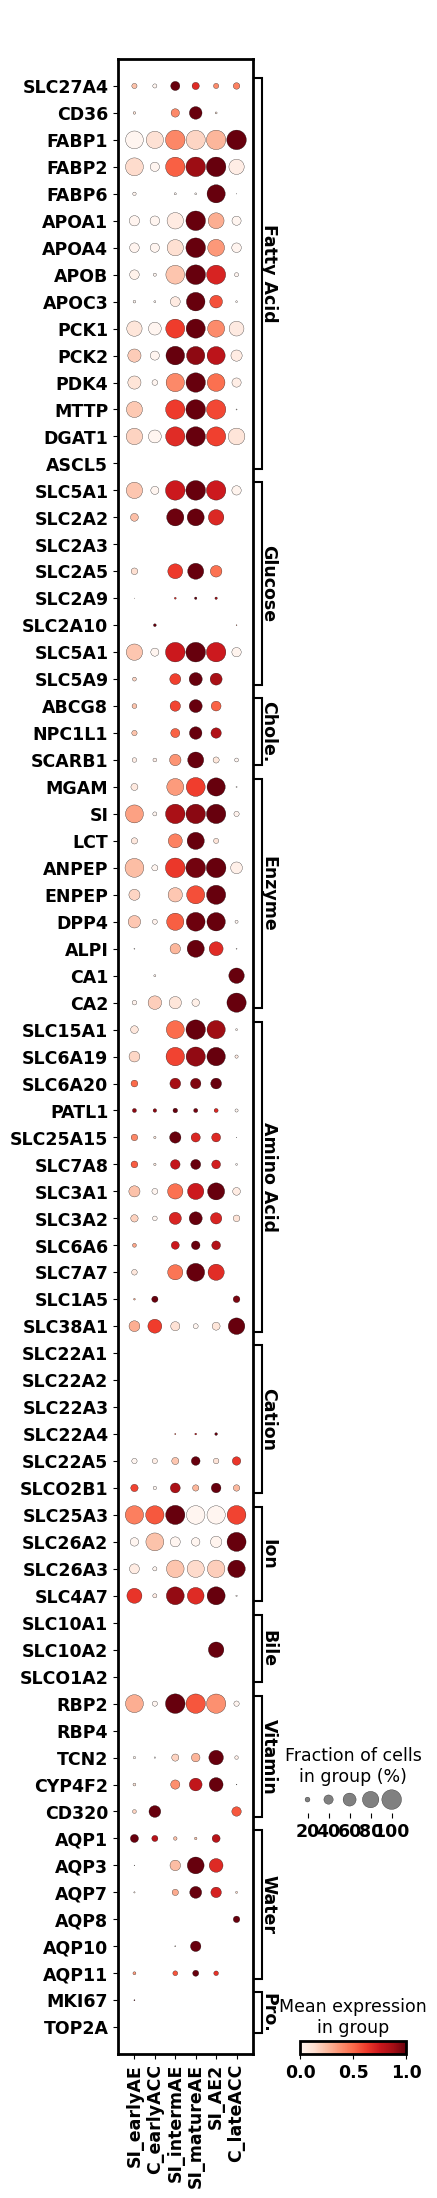

In [20]:
#matplotlib.rc_file_defaults()
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2}),
sc.pl.dotplot(adata_EC,
              absb, 'lineage',vmax =1, swap_axes = True, dot_min = 0.05, standard_scale='var',save = 'id_human_ec.png')

In [48]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in TW_gene_reordered.items() ])).to_csv('F:/Transwell/TW_DE_reordered.csv')

In [99]:
exp_human = pd.DataFrame()
for i in exp_genes.keys():
    additional = pd.DataFrame({
        i: exp_genes[i]
    })
    exp_human = pd.concat([exp_human, additional], ignore_index=False, axis=1)
exp_human.to_excel('exp_human.xlsx')

In [5]:
dataSI = adata[adata.obs['organ']=='SI',:] #divide data into SI and Colon
dataC = adata[adata.obs['organ']=='Colon',:]

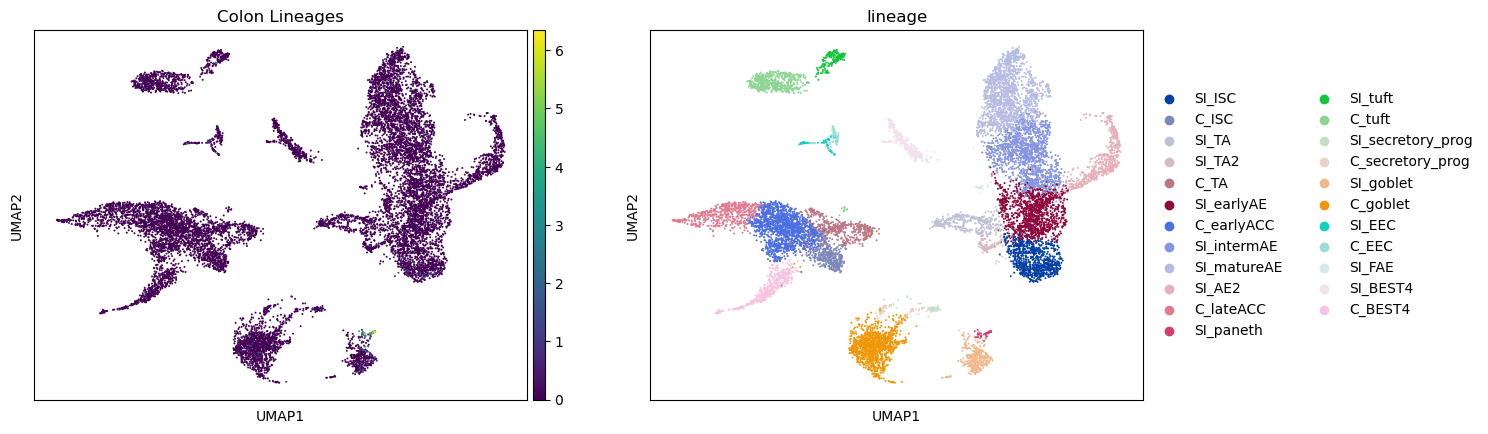

In [36]:
sc.pl.umap(adata, color = ['PRSS2','lineage'], title = 'Colon Lineages',size = 8) #overview of the graph

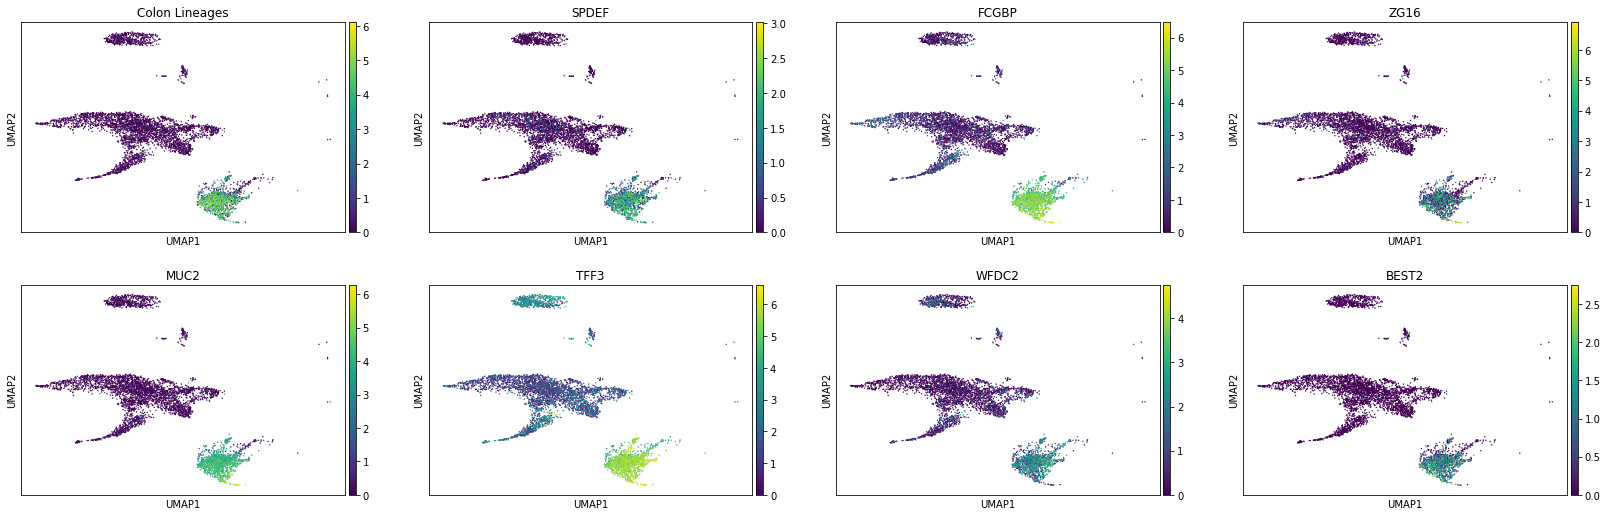

In [19]:
sc.pl.umap(dataC, color = ['CLCA1', 'SPDEF', 'FCGBP', 'ZG16', 'MUC2','TFF3','WFDC2','BEST2'], title = 'Colon Lineages',size = 8) #overview of the graph

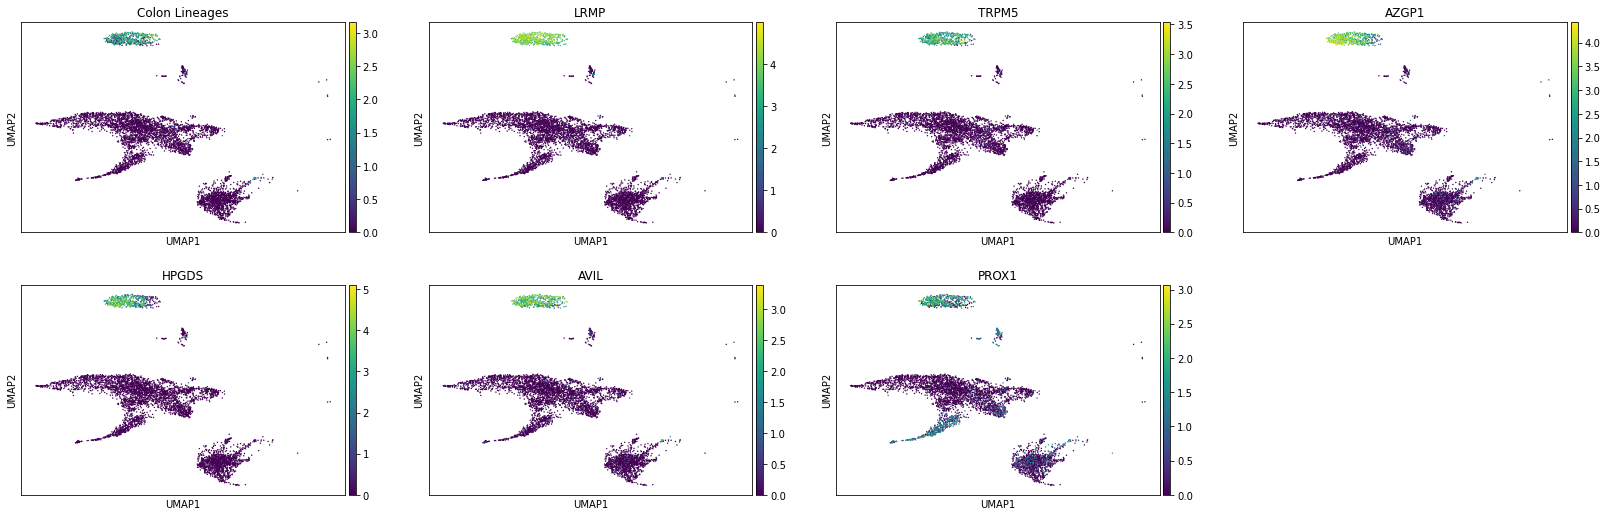

In [20]:
sc.pl.umap(dataC, color = ['POU2F3', 'LRMP', 'TRPM5','AZGP1','HPGDS','AVIL','PROX1'], title = 'Colon Lineages',size = 8) #overview of the graph

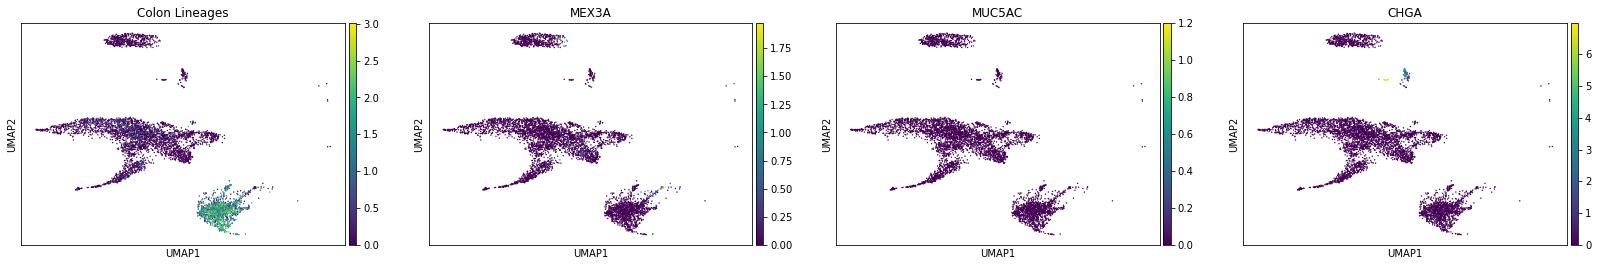

In [55]:
sc.pl.umap(dataC, color = ['SPDEF','MEX3A','MUC5AC','CHGA'], title = 'Colon Lineages',size = 8) #overview of the graph

In [23]:
g321=sc.tl.rank_genes_groups(adata, groupby='lineage', groups = ['C_lateACC'], reference = 'SI_matureAE',key_added='rank',method = 'wilcoxon',copy = True)

In [36]:
log2foldmask = np.array(g321.uns['rank']['logfoldchanges'].astype('double')>6)
pvalmask = g321.uns['rank']['pvals'].astype('double')<0.001
additional = pd.DataFrame(g321.uns['rank']['names'][log2foldmask & pvalmask])

In [146]:
adata.obs['region']

TGAATCGAGTTTCGAC-1-0    Jej
ACCCTCAAGTGTTCCA-1-0    Jej
CCACACTTCTCCTGTG-1-1    Jej
TGTCAGAGTACGTTCA-1-1     AC
TTGTGGATCCGCGGAT-1-0    Jej
                       ... 
AAGCCATGTCCGGCAT-1-1     AC
ACTGTCCAGTATGATG-1-1    Ile
GTCTAGAGTGACTGTT-1-0     TC
TTTCAGTCAGTTCTAG-1-2     AC
TAGAGTCGTCGGTAAG-1-0    Duo
Name: region, Length: 12590, dtype: category
Categories (6, object): ['Duo', 'Jej', 'Ile', 'AC', 'TC', 'DC']

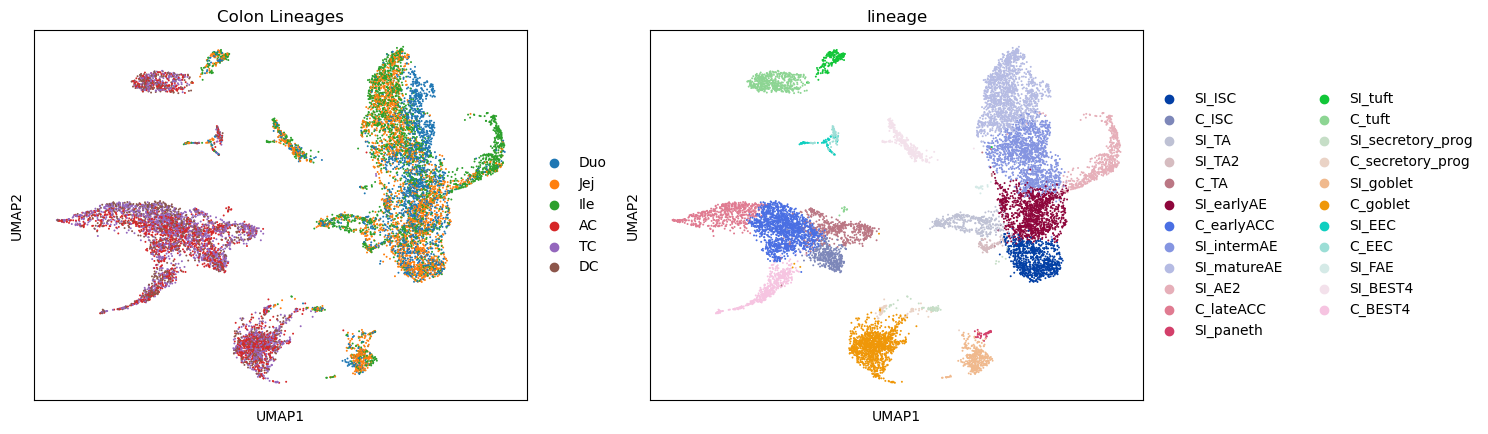

In [7]:
sc.pl.umap(adata, color = ['region','lineage'], title = 'Colon Lineages',size = 8) #overview of the graph

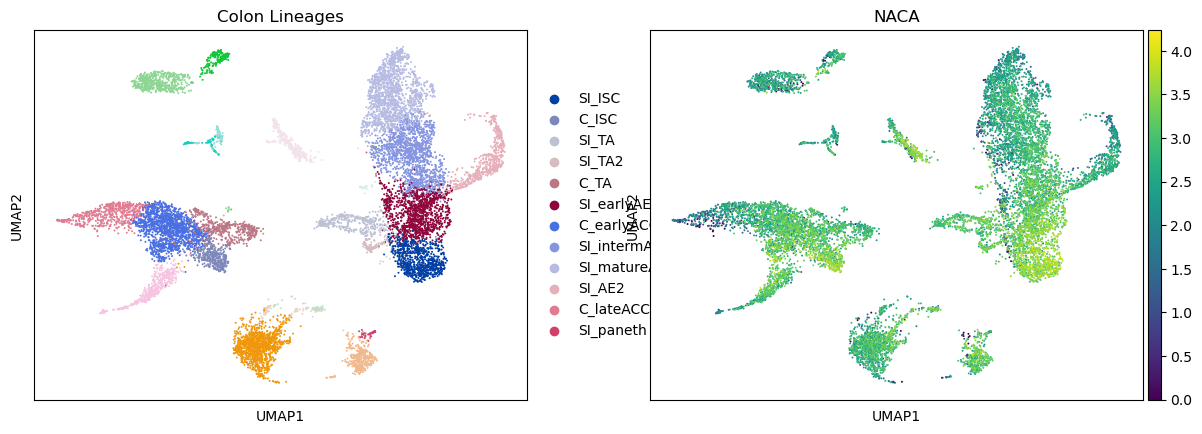

In [49]:
sc.pl.umap(adata, color = ['lineage','NACA'], title = 'Colon Lineages',size = 8) #overview of the graph

In [9]:
sig = ['RARRES2', 'SMOC2', 'CEL', 'LGR5', 'PIWIL2', 'CYP4X1', 'GDF15',
        'GDF15', 'CLDN2', 'ASCL2', 'ARID5B', 'RGMB', 'RNF43', 'ALDH1B1',
        'LGR5', 'RARRES2', 'OLFM4', 'APIP', 'SEMA3C', 'PTPRO', 'ASCL2',
        'EPHB3', 'NOB1', 'FXYD5', 'PDZK1IP1', 'RGMB', 'SCUBE2', 'PRDX5',
        'ALDH1B1', 'PMEPA1', 'CDK6', 'ETS2', 'CDK6', 'ZBTB38', 'RNF43',
        'MYC', 'VDR', 'RNF186', 'PIK3R1', 'QPRT', 'RACK1', 'GPX2',
        'FERMT1', 'SLC12A2', 'NOB1', 'STOX1', 'CTSH', 'TOMM20', 'RSL1D1',
        'EIF3E', 'RUBCNL', 'TSPAN8', 'EIF3D', 'TRIM24', 'NACA', 'BTF3',
        'ZNF814', 'QPRT', 'BTF3', 'NACA', 'EIF3E', 'PDZK1IP1', 'TSPAN6',
        'FCGRT', 'RAMP1', 'BLNK', 'TGFBR2', 'NME4', 'RACK1', 'HMGCS2',
        'SERINC5', 'COMMD6', 'QTRT1', 'PSD3']

In [47]:
ISC = adata[adata.obs['lineage'] == 'SI_ISC',sig]
ISC.X = ISC.layers['raw_normalized'].A
sc.pp.log1p(ISC)
df = pd.DataFrame(ISC.X,columns =sig, index = ISC.obs_names)

C:\Users\16220\anaconda3\envs\scvi-env\lib\site-packages\scanpy\preprocessing\_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\16220\anaconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


C:\Users\16220\anaconda3\envs\scvi-env\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


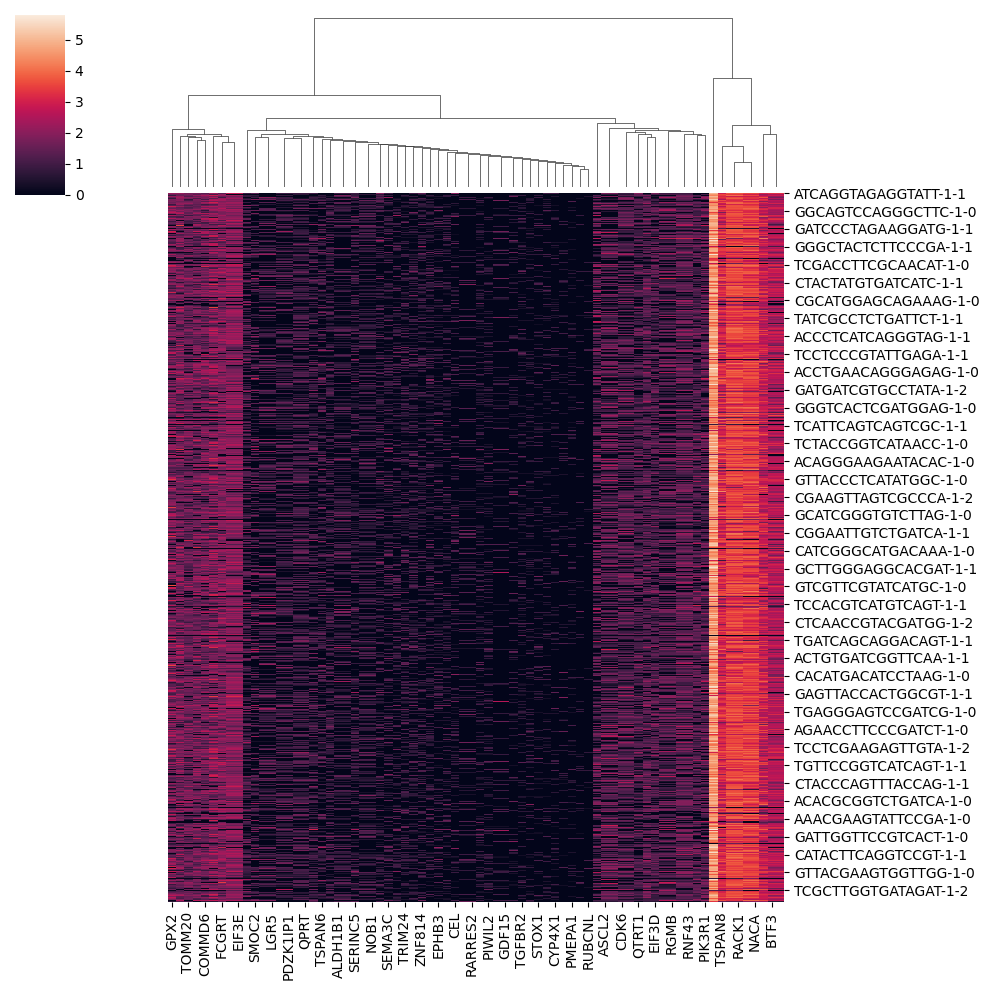

In [48]:
sns.clustermap(df, row_cluster = False)

In [32]:
datac = dataC.copy()
datac.X = dataC.layers['raw_normalized']

In [83]:
cc_genes = pd.read_excel('\GSE185224\Triosh_cc.xlsx')

In [80]:
s_genes = cc_genes['G1/S'].dropna()
g2m_genes = cc_genes['G2/M'].dropna()

s_genes_mm_ens = dataC.var_names[np.in1d(dataC.var_names, s_genes)]
g2m_genes_mm_ens = dataC.var_names[np.in1d(dataC.var_names, g2m_genes)]

In [81]:
sc.tl.score_genes_cell_cycle(dataC, s_genes=s_genes_mm_ens, g2m_genes=g2m_genes_mm_ens)

## Make comparison Heatmap

In [3]:
hm = adata
hm.X = hm.layers['raw_normalized']
sc.pp.log1p(hm)

In [4]:
hm2 = anndata.AnnData(X = hm.X)
hm2.var_names = hm.var_names
hm2.obs_names = hm.obs_names
hm2.obs['celltype'] = adata.obs['lineage']

In [5]:
hm2.X = scipy.sparse.csr_matrix((hm2.X.A-np.min(hm2.X))/(np.max(hm2.X)-np.min(hm2.X)+0.0001))

In [6]:
adata2 = sc.read_h5ad('221101.h5ad')

In [7]:
tw_missing = hm.var_names[hm.var_names.isin(adata2.var_names) == 0]

In [31]:
import anndata
import scipy
adata_vis = anndata.AnnData(X = scipy.sparse.hstack((adata.X, scipy.sparse.csr_array((len(adata.obs_names),len(missing))))))
adata_vis.var_names = list(adata.var_names) + list(missing.values.ravel())
adata_vis.obs_names = adata.obs_names
adata_vis.obs = adata.obs

C:\Users\16220\AppData\Local\Temp\ipykernel_70544\1649523300.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_vis = anndata.AnnData(X = scipy.sparse.hstack((adata.X, scipy.sparse.csr_array((len(adata.obs_names),len(missing))))))


In [13]:
adata_vis

AnnData object with n_obs × n_vars = 13784 × 33542
    obs: 'n_counts', 'n_genes', 'condition', 'phase', 'mt_frac', 'ribo_frac', 'leiden', 'condition_general', 'leiden8', 'overallannotated', 'detailannotated', 'verydetailannotated', 'roughannotated', 'leiden2', 'leiden3', 'leiden4', 'leiden5', 'leiden6'

In [10]:
combined = hm2.concatenate(tw,batch_categories = ['human','transwell'])

C:\Users\16220\anaconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [86]:
DEdf = pd.read_excel('F:\GSE185224\TW_DE.xlsx')

In [12]:
DEdf_common =  DEdf['SI ISC'][DEdf['SI ISC'].isin(DEdf['C ISC'])].dropna()
SIISCDE = DEdf['SI ISC'][DEdf['SI ISC'].isin(DEdf['C ISC']) == 0].dropna()
CISCDE =  DEdf['C ISC'][DEdf['C ISC'].isin(DEdf['SI ISC']) == 0].dropna()

In [15]:
Stem = combined[combined.obs['celltype'].isin(['PLA2G2A+ Fetal Stem-like','FGG+ Fetal Stem-like','SI_ISC','C_ISC']),:]

In [70]:
Stem_DE = list(DEdf_common.ravel()) + list(SIISCDE.ravel()) +list( CISCDE.ravel())
SI_score = np.sum(hm2[hm2.obs['celltype'] == 'SI_ISC' ,Stem_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'SI_ISC')
C_score = np.sum(hm2[hm2.obs['celltype'] == 'C_ISC' ,Stem_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'C_ISC')
FGG_score = np.sum(tw[tw.obs['celltype'] == 'FGG+ Fetal Stem-like' ,Stem_DE].X.A,axis = 0)/np.sum(tw.obs['celltype'] == 'FGG+ Fetal Stem-like')
PLA_score = np.sum(tw[tw.obs['celltype'] == 'PLA2G2A+ Fetal Stem-like' ,Stem_DE].X.A,axis = 0)/np.sum(tw.obs['celltype'] == 'PLA2G2A+ Fetal Stem-like')
tote = 1.5*SI_score +  C_score + FGG_score + PLA_score

In [71]:
id = np.flip(np.argsort(tote))
sortedDE = np.array(Stem_DE)[[id]]

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\1493845426.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sortedDE = np.array(Stem_DE)[[id]]


C:\Users\16220\AppData\Local\Temp\ipykernel_36944\1394277175.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  Stem.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)


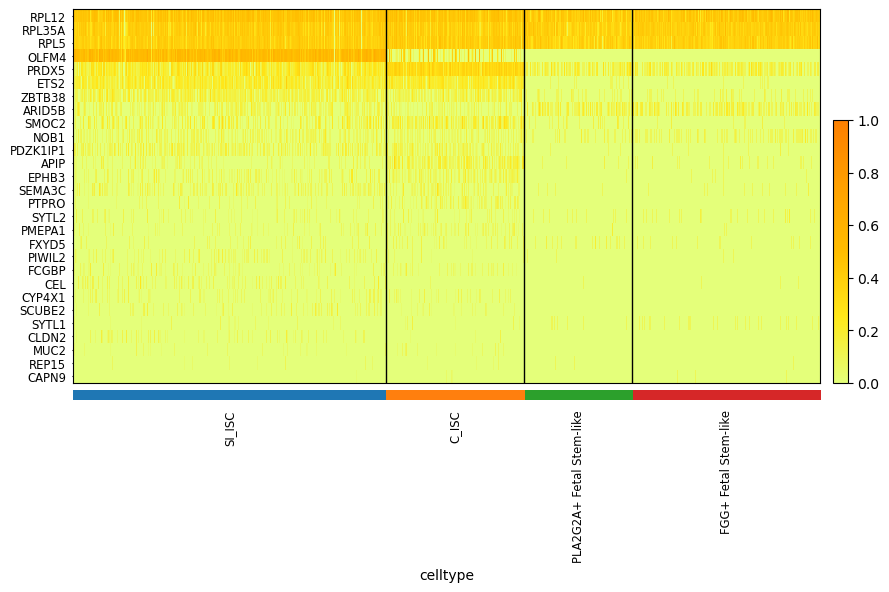

In [72]:
ordered_celltype = ['SI_ISC','C_ISC','PLA2G2A+ Fetal Stem-like','FGG+ Fetal Stem-like']
Stem.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)
Z = sc.pl.heatmap(Stem, sortedDE, groupby='celltype', swap_axes=True, vmax =1, cmap = 'Wistia', save = 'id_comp_stem.png')

In [73]:
GC = combined[combined.obs['celltype'].isin(['Goblet-like','SI_goblet','C_goblet']),:]

In [47]:
DEdf_common =  DEdf['SI GC'][DEdf['SI GC'].isin(DEdf['C GC'])].dropna()
SIGCDE = DEdf['SI GC'][DEdf['SI GC'].isin(DEdf['C GC']) == 0].dropna()
CGCDE =  DEdf['C GC'][DEdf['C GC'].isin(DEdf['SI GC']) == 0].dropna()

In [62]:
GC_DE = list(DEdf_common.ravel()) + list(SIGCDE.ravel()) +list( CGCDE.ravel())
SI_score = np.sum(hm2[hm2.obs['celltype'] == 'SI_goblet' ,GC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'SI_goblet')
C_score = np.sum(hm2[hm2.obs['celltype'] == 'C_goblet' ,GC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'C_goblet')
TWGC_score = np.sum(tw[tw.obs['celltype'] == 'Goblet-like' ,GC_DE].X.A,axis = 0)/np.sum(tw.obs['celltype'] == 'Goblet-like')

tote = 10*SI_score +  C_score + TWGC_score

In [65]:
id = np.flip(np.argsort(tote))
sortedDE = np.array(GC_DE)[[id]]

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\1008772486.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sortedDE = np.array(GC_DE)[[id]]


In [66]:
sortedDE

array(['FCGBP', 'CLCA1', 'SPINK4', 'MUC2', 'ITLN1', 'REP15', 'SYTL2',
       'BCAS1', 'ZG16', 'GALNT5', 'LRRC26', 'SLC50A1', 'LINC00261',
       'MLPH', 'ABCA4', 'KCNK6', 'ANO7', 'SLC39A11', 'GALNT8', 'CAPN9',
       'CREB3L4', 'STXBP5-AS1', 'CAPN8', 'FAM177B', 'KDELR3', 'MARVELD1',
       'DGKD', 'NXPE1', 'SYTL1', 'RNF207', 'SYNE1', 'TAGLN', 'FER1L6',
       'PRIMPOL', 'AKAP5', 'B3GNT6', 'BEST2', 'SMIM33', 'RGS10',
       'TNFRSF11B', 'STK10', 'SLC17A9', 'MFSD4A'], dtype='<U10')

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\189248182.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  GC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)


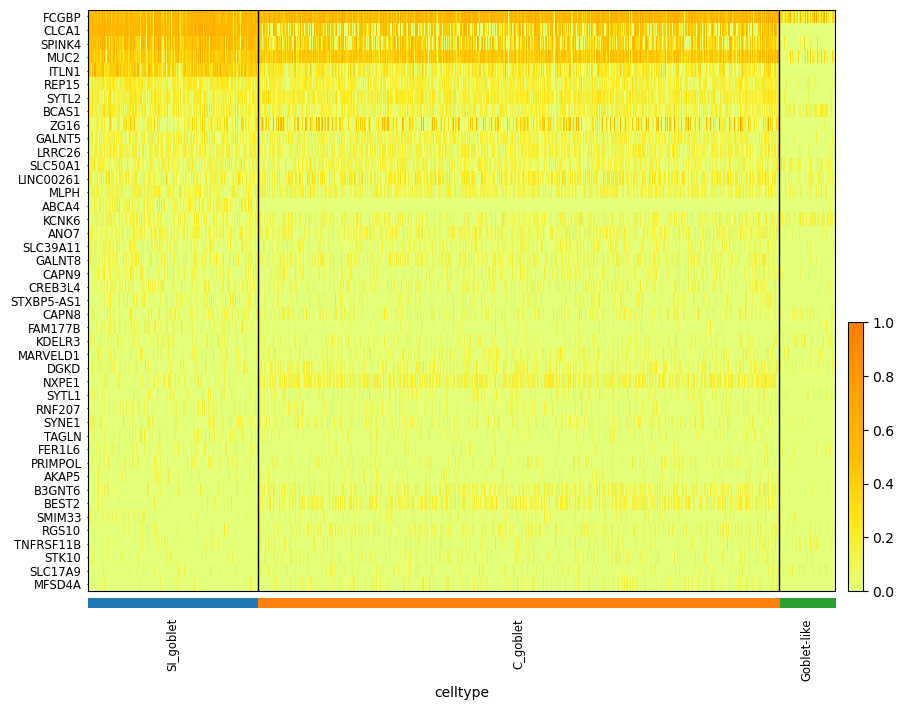

In [69]:
ordered_celltype = ['SI_goblet','C_goblet','Goblet-like']
GC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)
Z = sc.pl.heatmap(GC, sortedDE, groupby='celltype', swap_axes=True, vmax =1, cmap = 'Wistia', save = 'id_comp_GC.png')

In [83]:
EC = combined[combined.obs['celltype'].isin(['SLC2A3+ Early EC-like','GNRH2+ Early EC-like','Fetal SI Early EC-like','LYZ+ Early EC-like','SI_matureAE','SI_earlyAE','SI_intermAE','C_lateACC','C_earlyACC','SI_AE2']),:]

In [78]:
DEdf_common =  DEdf['SI EC'][DEdf['SI EC'].isin(DEdf['C EC'])].dropna()
SIECDE = DEdf['SI EC'][DEdf['SI EC'].isin(DEdf['C EC']) == 0].dropna()
CECDE =  DEdf['C EC'][DEdf['C EC'].isin(DEdf['SI EC']) == 0].dropna()

In [79]:
EC_DE = list(DEdf_common.ravel()) + list(SIECDE.ravel()) +list( CECDE.ravel())
SI_score = np.sum(hm2[hm2.obs['celltype'] == 'SI_matureAE' ,EC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'SI_matureAE')
C_score = np.sum(hm2[hm2.obs['celltype'] == 'C_lateACC' ,EC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'C_lateACC')
TWEC_score = np.sum(tw[tw.obs['celltype'] == 'Fetal SI Early EC-like' ,EC_DE].X.A,axis = 0)/np.sum(tw.obs['celltype'] == 'Fetal SI Early EC-like')

tote = 10*SI_score +  C_score + TWEC_score

In [80]:
id = np.flip(np.argsort(tote))
sortedDE = np.array(EC_DE)[[id]]

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\182166948.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sortedDE = np.array(EC_DE)[[id]]


In [81]:
sortedDE

array(['APOA4', 'APOA1', 'FABP1', 'RBP2', 'CBR1', 'SLC26A3', 'AKR1B10',
       'CYP2C9', 'SLC46A1', 'ENPP7', 'SLC26A2', 'TMPRSS15', 'HHLA2',
       'SEMA6D', 'SLC51B', 'C1QTNF12', 'AQP10', 'CA2', 'COL17A1', 'GCNT3',
       'ADH1C', 'ABR', 'COL25A1', 'CA1', 'SLC6A4', 'B3GNT7', 'CRYBG2',
       'TRPM6', 'SLC2A12', 'TRUB2', 'PI3', 'CLCA4', 'GDPD3', 'STEAP3',
       'CPO', 'GSTA2', 'FABP6', 'SCN9A', 'AC093607.1', 'MS4A12', 'SCNN1B',
       'TNFSF13B', 'AQP8', 'AC092834.1', 'TMIGD1', 'STBD1', 'CLDN8',
       'LRFN4', 'SLC10A2', 'CUBN', 'PLB1'], dtype='<U10')

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\3182087176.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  EC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)


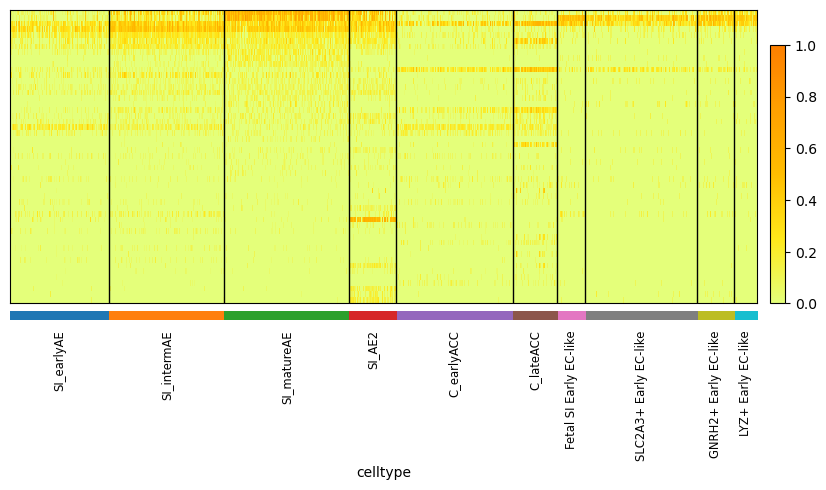

In [85]:
ordered_celltype = ['SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','C_earlyACC','C_lateACC','Fetal SI Early EC-like','SLC2A3+ Early EC-like','GNRH2+ Early EC-like','LYZ+ Early EC-like',]
EC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)
Z = sc.pl.heatmap(EC, sortedDE, groupby='celltype', swap_axes=True, vmax =1, cmap = 'Wistia', save = 'id_comp_EC.png')

In [88]:
EEC = combined[combined.obs['celltype'].isin(['SI_EEC','C_EEC','Early EEC-like 1', 'Early EEC-like 2'])]

In [89]:
DEdf_common =  DEdf['SI EEC'][DEdf['SI EEC'].isin(DEdf['C EEC'])].dropna()
SIEECDE = DEdf['SI EEC'][DEdf['SI EEC'].isin(DEdf['C EEC']) == 0].dropna()
CEECDE =  DEdf['C EEC'][DEdf['C EEC'].isin(DEdf['SI EEC']) == 0].dropna()

In [90]:
EEC_DE = list(DEdf_common.ravel()) + list(SIEECDE.ravel()) +list( CEECDE.ravel())
SI_score = np.sum(hm2[hm2.obs['celltype'] == 'SI_EEC' ,EEC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'SI_EEC')
C_score = np.sum(hm2[hm2.obs['celltype'] == 'C_EEC' ,EEC_DE].X.A,axis = 0)/np.sum(hm2.obs['celltype'] == 'C_EEC')
TWEEC_score = np.sum(tw[tw.obs['celltype'] == 'Early EEC-like 1' ,EEC_DE].X.A,axis = 0)/np.sum(tw.obs['celltype'] == 'Early EEC-like 1')

tote = 10*SI_score +  C_score + TWEEC_score

In [92]:
id = np.flip(np.argsort(tote))
sortedDE = np.array(EEC_DE)[[id]]

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\475084488.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sortedDE = np.array(EEC_DE)[[id]]


In [93]:
sortedDE

array(['CHGA', 'NEUROD1', 'SCGN', 'CHGB', 'FEV', 'CRYBA2', 'SCG2', 'GCG',
       'PYY', 'UCN3', 'KCNJ6', 'NTS', 'STXBP5L', 'LCN15', 'RUNX1T1',
       'BAALC', 'LMX1A', 'NLRP1', 'GNAO1', 'CDK5R2', 'ANK2', 'KCNK17',
       'DUSP26', 'CHST9', 'MARCH4', 'TMEFF2', 'CPLX2', 'ELAVL4', 'FFAR1',
       'MAP6', 'SRRM3', 'PAPPA2', 'PPFIA2', 'SYT4', 'NRXN1', 'PPP2R2B'],
      dtype='<U7')

C:\Users\16220\AppData\Local\Temp\ipykernel_36944\839799094.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  EEC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)


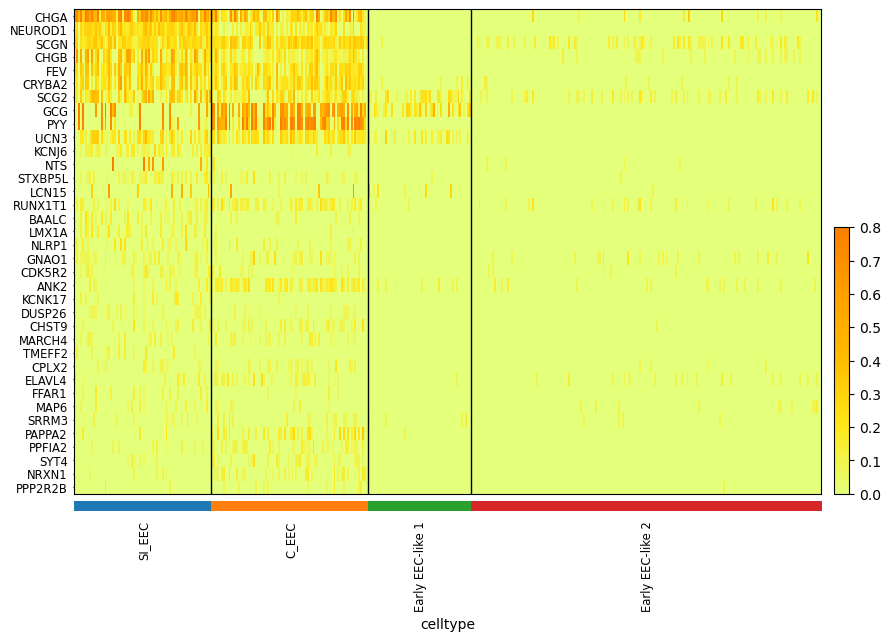

In [97]:
ordered_celltype = ['SI_EEC','C_EEC','Early EEC-like 1', 'Early EEC-like 2']
EEC.obs['celltype'].cat.reorder_categories(ordered_celltype, inplace= True)
Z = sc.pl.heatmap(EEC, sortedDE, groupby='celltype', swap_axes=True, vmax =0.8, cmap = 'Wistia', save = 'id_comp_EEC.png')

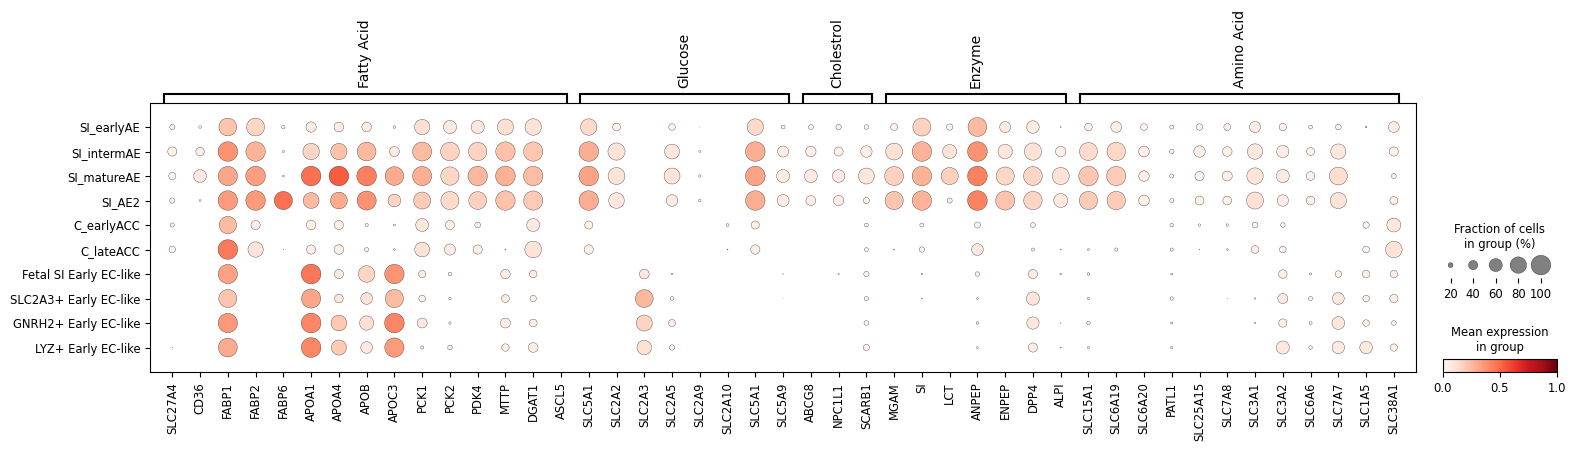

In [125]:
absb = dict()
absb['Fatty Acid']=['SLC27A4', 'CD36', 'FABP1', 'FABP2', 'FABP6', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'PCK1', 'PCK2', 'PDK4', 'MTTP', 'DGAT1', 'ASCL5']
absb['Glucose']=['SLC5A1', 'SLC2A2','SLC2A3', 'SLC2A5', 'SLC2A9', 'SLC2A10', 'SLC5A1', 'SLC5A9'] # SLC5A4
absb['Cholestrol']=['ABCG8', 'NPC1L1', 'SCARB1']
absb['Enzyme']=['MGAM', 'SI', 'LCT', 'ANPEP', 'ENPEP', 'DPP4', 'ALPI']
absb['Amino Acid']=['SLC15A1', 'SLC6A19', 'SLC6A20', 'PATL1', 'SLC25A15', 'SLC7A8', 'SLC3A1', 'SLC3A2', 'SLC6A6', 'SLC7A7', 'SLC1A5', 'SLC38A1']
sc.pl.dotplot(EC,
              absb, 'celltype', 
              vmax =1, swap_axes = False, dot_min = 0.05, save = 'EC1.png'
              )

In [128]:
absb = dict()
absb['Cation']=['SLC22A1', 'SLC22A3', 'SLC22A4', 'SLC22A5', 'SLCO2B1']
absb['Ion']=['SLC25A3', 'SLC26A3', 'SLC4A7']
absb['Vitamin']=['RBP2', 'RBP4', 'TCN2', 'CYP4F2', 'CD320']
absb['Water']=['AQP1', 'AQP3', 'AQP7', 'AQP8', 'AQP10', 'AQP11']
absb['Proliferative'] = ['MKI67','TOP2A']

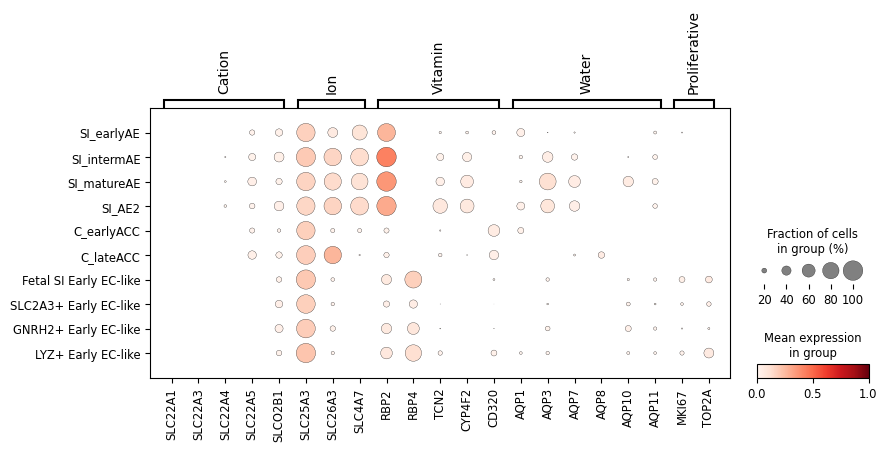

In [129]:
sc.pl.dotplot(EC,
              absb, 'celltype', 
              vmax =1, swap_axes = False, dot_min = 0.05, save = 'EC2.png'
              )

In [106]:
sec = dict()
sec['Progenitor'] =['HES6','SOX4','STMN1']
sec['Goblet'] = ['FCGBP','MUC2','MUC5AC','TFF3','ATOH1','DLL1']
sec['Early Enteroendocrine'] = ['PAX4', 'INSM1', 'NEUROG3','RIMBP2'] 
sec['Enteroendocrine-L'] = ['GCG', 'UCN3', 'ETV1','PROX1']
sec['Enteroendocrine-D'] = ['SST','PCP4','HHEX']
sec['Signaturee'] = ['VGF']
sec['Proliferative'] = ['MKI67','TOP2A']

C:\Users\16220\anaconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


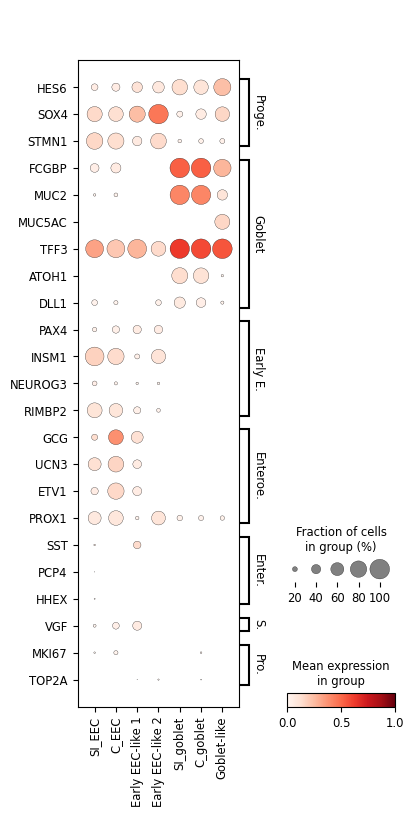

In [118]:
SEC = EEC.concatenate(GC)
ordered_celltype = ['SI_EEC','C_EEC','Early EEC-like 1', 'Early EEC-like 2','SI_goblet','C_goblet','Goblet-like']

sc.pl.dotplot(SEC,
              sec, 'celltype', categories_order = ordered_celltype,
             vmax =1, swap_axes = True, dot_min = 0.05, save = 'sec.png'
              )

In [ ]:
sc.pl.umap(adata, color=['HTR1A','lineage'],size = 8)

In [46]:
sc.tl.leiden(adata,resolution=0.92,key_added= 'leiden_r092')

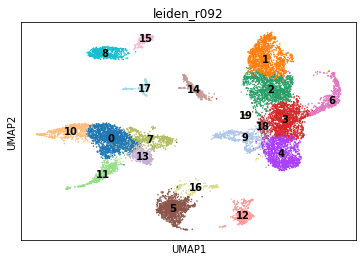

In [29]:
sc.pl.umap(adata, color='leiden_r092', legend_loc = 'on data')

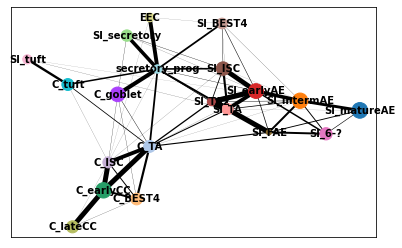

In [32]:
sc.tl.paga(adata,groups='leiden')
sc.pl.paga(adata)

In [35]:
from scanpy.tools._utils import get_init_pos_from_paga
init_coords = get_init_pos_from_paga(adata)

In [90]:
sc.tl.rank_genes_groups(adata, groupby='lineage',groups = ['C_lateACC','SI_AE2','SI_matureAE'], key_added='rank',method = 'wilcoxon')

In [95]:
pass_genes = pd.DataFrame()
for i in set(['C_lateACC','SI_AE2','SI_matureAE']):
    log2foldmask = adata.uns['rank']['logfoldchanges'][i].astype('double')>5
    pvalmask = adata.uns['rank']['pvals'][i].astype('double')<0.01
    additional = pd.DataFrame({
        i: adata.uns['rank']['names'][i].astype('str')[log2foldmask & pvalmask]
    })
    pass_genes = pd.concat([pass_genes, additional], ignore_index=False, axis=1) 

In [96]:
pass_genes

,SI_AE2,C_lateACC,SI_matureAE
0,FABP6,SLC26A2,APOA4
1,PLB1,CA1,APOA1
2,TMIGD1,CEACAM7,APOB
3,SLC10A2,MS4A12,ALDOB
4,CPO,DHRS9,APOC3
5,FAM151A,SCNN1G,ENPP7
6,CUBN,CD177,SLC46A1
7,AC008609.1,AQP8,AQP10
8,AL121974.1,AC087379.1,COL25A1
9,SLC17A8,ABCB11,TUBA3D


In [57]:
pass_genes.to_excel('pass_genes.xlsx')

In [65]:
marker_genes = dict()
marker_genes['Stem'] = ['LGR5', 'ASCL2','SMOC2']
marker_genes['Cancer Stem'] = ['PROM1','CD44','CD24']
#marker_genes['Paneth'] = ['DEFA5','DEFA6','REG3A','ITLN2','PLA2G2A'] # No paneth in colon
marker_genes['Transit_amplifying'] = ['MKI67','TOP2A','CENPA','MXD3','FOXM1','PCNA','EPHB2','MSI1'] # Divide this into G1 and G2, HES1 commit to ent
marker_genes['Goblet'] = ['SPDEF', 'FCGBP', 'ZG16', 'MUC2','TFF3','BEST2'] #(ATOH1) # Divide this into secretory progenitor?? BEST2 specifically for colon goblet
marker_genes['Secretory_Progenitors'] = ['ATOH1','DLL1']
marker_genes['BEST4_enterocytes'] = ['BEST4','OTOP2','CA7','SPIB']
#marker_genes['Enterocyte'] = ['RBP2','ANPEP', 'FABP2']
marker_genes['Colonocytes'] = ['CA1','SLC26A3','CEACAM7','FABP1','CA2','SLC26A2'] # DIVIDE this into mature and immature (BATF2)
#marker_genes['Microfold_cells'] = ['SPIB', 'GP2','IGHA1']
marker_genes['Tuft'] = ['POU2F3', 'LRMP', 'TRPM5','AZGP1','AVIL']
marker_genes['Enteroendocrine'] = ['CHGA', 'CHGB']
marker_genes['Neural'] = ['ETV1','BNC2']

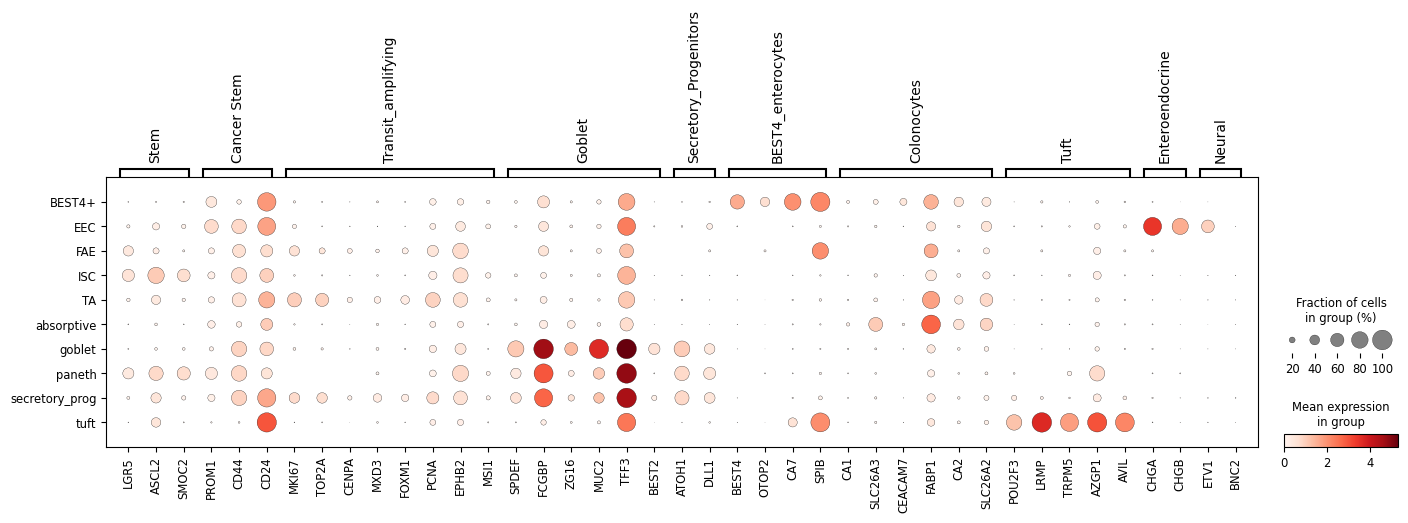

In [67]:
sc.pl.dotplot(adata, marker_genes, 'type')

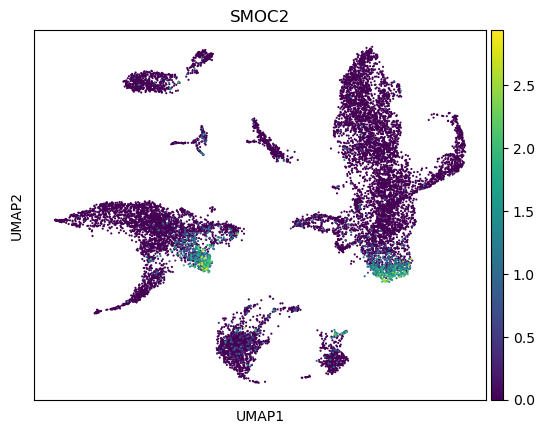

In [5]:
sc.pl.umap(adata, color = 'SMOC2')

In [8]:
adata

AnnData object with n_obs × n_vars = 12590 × 23547
    obs: 'hash_label', 'hash_cluster', 'n_genes', 'species', 'tissue', 'hashed', 'sex', 'group', 'treatment', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'donor', 'region', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden', 'lineage', 'type', 'organ', 'cds', 'donor_region', 'dpt_pseudotime'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 's_phase', 'g2m_phase', 'gene_ids', 'feature_types', 'genome', 'mt', 'Donor_2-n_cells', 'Donor_1-n_cells', 'Donor_3-n_cells', 'Donor_2-n_cells_by_counts', 'Donor_1-n_cells_by_counts', 'Donor_3-n_cells_by_counts', 'Donor_2-mean_counts', 'Donor_1-mean_counts', 'Donor_3-mean_counts', 'Donor_2-pct_dropout_by_counts', 'Donor_1-pct_dropout_by_counts', 'Donor_3-pct_dropout_by_counts', 'Donor_2-total_counts', 'Donor_1-total_counts', 'Donor_3-total_counts'
    uns: 'do

In [50]:
ECLC = adata[[i in ['C_earlyACC','C_lateACC','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2'] for i in adata.obs['lineage']],:]

In [51]:
ECLCdf = pd.DataFrame(ECLC.X.A, index = ECLC.obs_names, columns = ECLC.var_names)

In [52]:
ECLCdf['sort'] = ECLC.obs['lineage'].values.ravel()
ECLCdf = ECLCdf.sort_values(by = 'sort')

In [53]:
absb = dict()
absb['Fatty Acid']=['SLC27A4', 'CD36', 'FABP1', 'FABP2', 'FABP6', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'PCK1', 'PCK2', 'PDK4', 'MTTP', 'DGAT1', 'ASCL5']
absb['Glucose']=['SLC5A1', 'SLC2A2','SLC2A3', 'SLC2A5', 'SLC2A9', 'SLC2A10', 'SLC5A1', 'SLC5A9'] # SLC5A4
absb['Cholestrol']=['ABCG8', 'NPC1L1', 'SCARB1']
absb['Enzyme']=['MGAM', 'SI', 'LCT', 'ANPEP', 'ENPEP', 'DPP4', 'ALPI','CA1','CA2']
absb['Amino Acid']=['SLC15A1', 'SLC6A19', 'SLC6A20', 'PATL1', 'SLC25A15', 'SLC7A8', 'SLC3A1', 'SLC3A2', 'SLC6A6', 'SLC7A7', 'SLC1A5', 'SLC38A1']
absb['Cation']=['SLC22A1', 'SLC22A2', 'SLC22A3', 'SLC22A4', 'SLC22A5', 'SLCO2B1']
absb['Ion']=['SLC25A3', 'SLC26A3', 'SLC4A7']
absb['Vitamin']=['RBP2', 'RBP4', 'TCN2', 'CYP4F2', 'CD320']
absb['Water']=['AQP1', 'AQP3', 'AQP7', 'AQP8', 'AQP10', 'AQP11']

In [54]:
absb_list = [item for sublist in list(absb.values()) for item in sublist]

In [55]:
color = np.array(ECLCdf['sort'].values.ravel())
for j in range(0, len(color)):
        id = np.where(adata.obs['lineage'].cat.categories == color[j])[0][0]
        color[j]=adata.uns['lineage_colors'][id]

In [56]:
from sklearn.model_selection import train_test_split
partial_features, _ = train_test_split(absb_list,test_size=0.2, random_state=42)

In [57]:
#format unseen
aligned_df = pd.DataFrame()
for i in partial_features:
    if i in ECLCdf.columns:
        aligned_df[i] = ECLCdf[i]
    else:
        aligned_df[i] = np.zeros(ECLCdf.shape[0])

In [58]:
sorted_list = ['SLC25A3',
 'APOC3',
 'FABP1',
 'DPP4',
 'SLC2A3',
 'RBP4',
 'DGAT1',
 'SLC38A1',
 'SLCO2B1',
 'SLC3A2',
 'RBP2',
 'SLC2A5',
 'AQP10',
 'SLC26A3',
 'SLC15A1',
 'SLC6A6',
 'TCN2',
 'AQP11',
 'PCK2',
 'PATL1',
 'ANPEP',
 'AQP3',
 'CD320',
 'SLC22A3',
 'ALPI',
 'SI',
 'SLC5A9',
 'SLC22A5',
 'SLC3A1',
 'FABP2',
 'AQP7',
 'NPC1L1',
 'SLC5A1',
 'SLC5A1',
 'SLC25A15',
 'SLC4A7',
 'SLC22A4',
 'SLC2A10',
 'SLC6A20',
 'CA2',
 'CD36',
 'MGAM',
 'PDK4',
 'ASCL5',
 'ABCG8',
 'SLC22A1',
 'CA1',
 'SLC2A9',
 'SLC22A2',
 'ENPEP',
 'SLC7A7',
 'APOB',
 'APOA4']

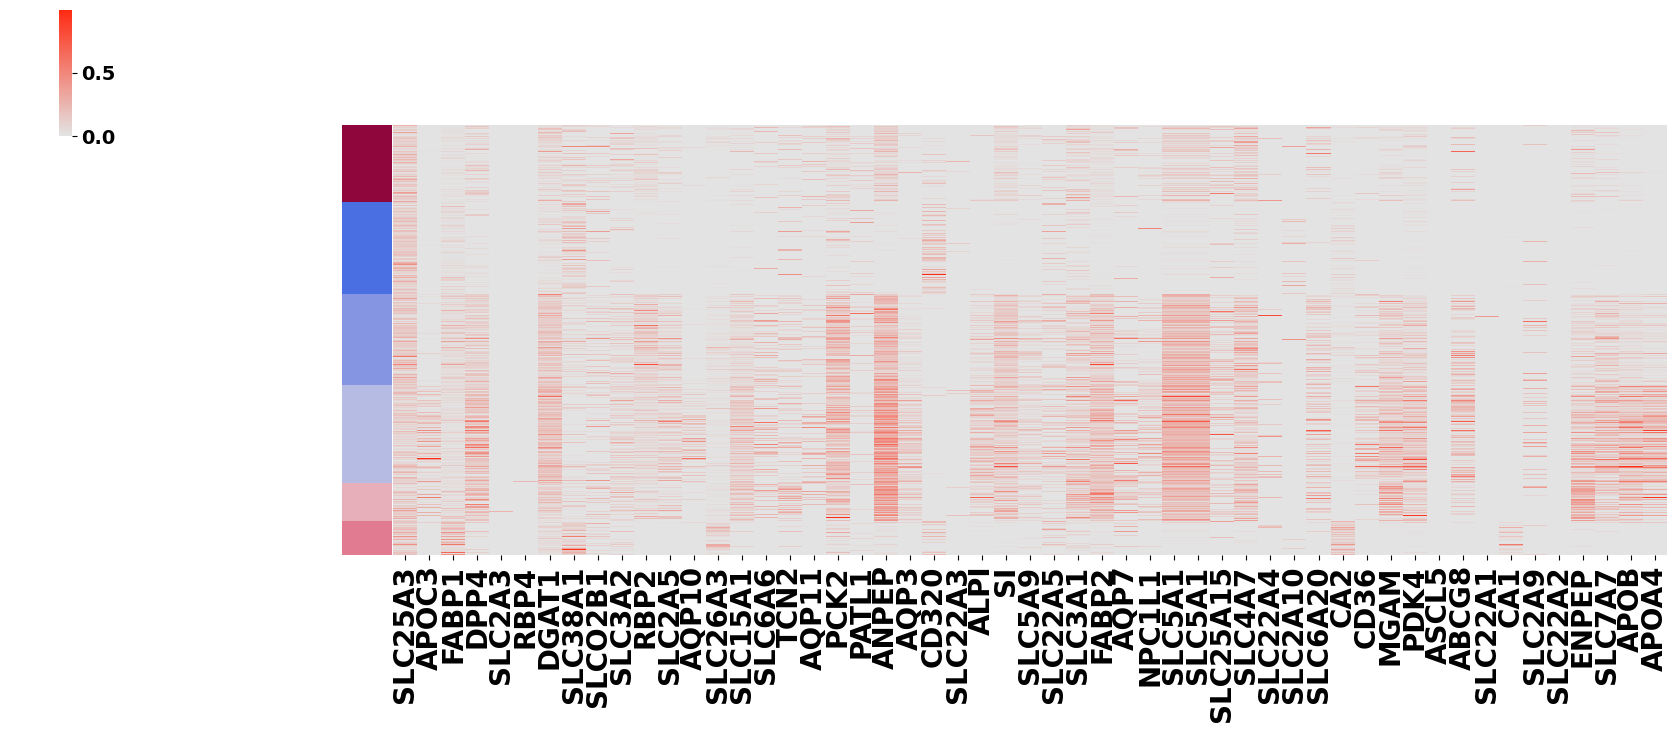

In [59]:
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})
z=sns.clustermap(aligned_df[sorted_list].apply(lambda x: x/(x.max()+0.001), axis=0),row_cluster = False,col_cluster = False,row_colors = color, yticklabels = False,xticklabels=True,figsize = [17,7],cmap=my_cmap ,cbar_kws={"ticks":[0,0.5,1]})
z.cax.set_aspect(10)
z.ax_col_dendrogram.set_visible(False)
z.cax.tick_params
ax= z.fig.get_axes()
ax[3].xaxis.set_tick_params(labelsize=20)
plt.savefig('ECLC_human_lite.jpg',bbox_inches='tight')